# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
    * 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


# 2.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

## (1) Sales (Target) 

In [4]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량(수치화)

In [5]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

3) 분포 확인(시각화)

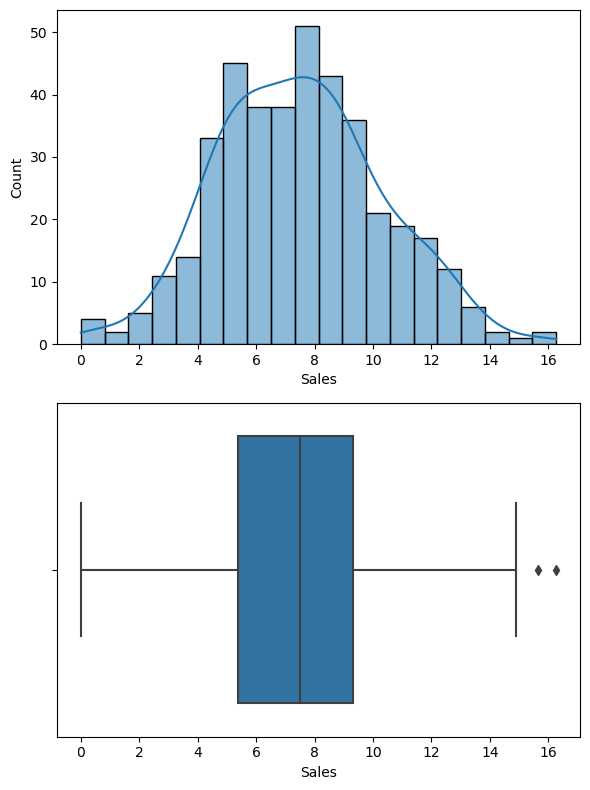

In [9]:
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)


plt.subplot(2,1,2)
sns.boxplot(x=data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

5) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

## (2) CompPrice

In [39]:
def eda1_n(data,var, bins=20) :
    # 기초통계량 
    display(data[[var]].describe().T)
    # # 시각화 
    plt.figure(figsize = (12,8)) 
    
    plt.subplot(2,1,1) 
    sns.histplot(x = var, data = data, bins = bins, kde = True) 
    plt.subplot(2,1,2) 
    sns.boxplot(x = var, data = data) 
    plt.grid() 
    plt.tight_layout()
    plt.show()

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [12]:
display(data[['CompPrice']].describe().T)

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


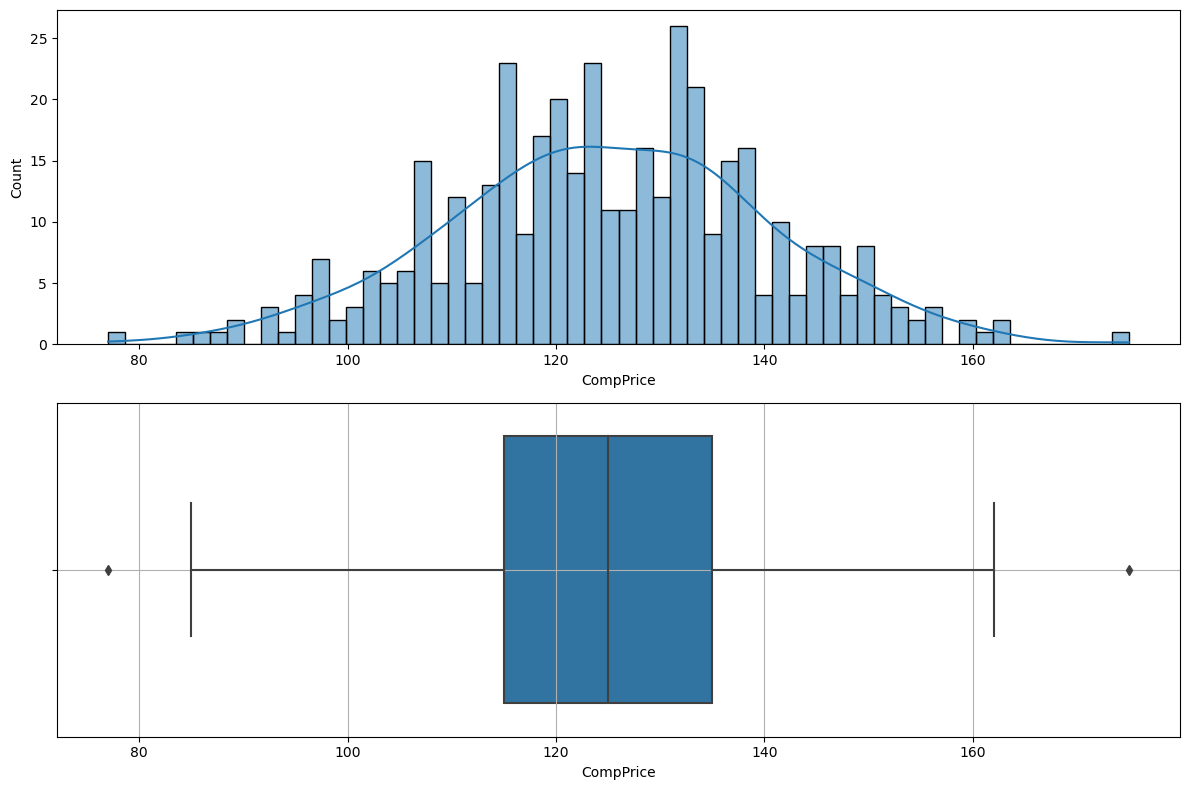

In [40]:
eda1_n(data, 'CompPrice', 60)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

*주변 경쟁사 가격은 180~140달러로 집중되어 형성됨

5) 추가 분석해 볼 사항이 있나요?

## (3) Income

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [14]:
data[['Income']].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


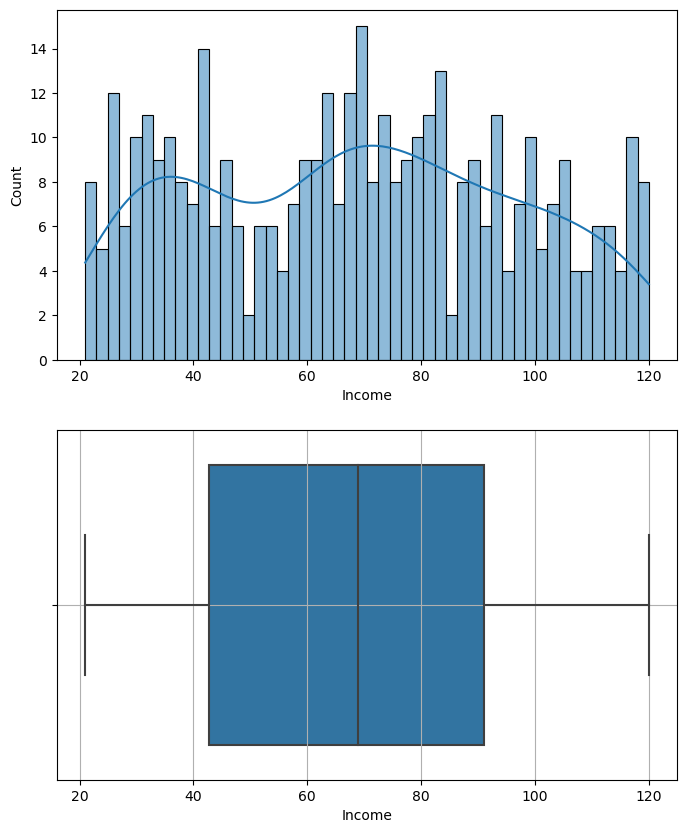

In [34]:
eda1_n(data, 'Income', 50)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (4) Advertising

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [16]:
data[['Advertising']].describe().T

,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


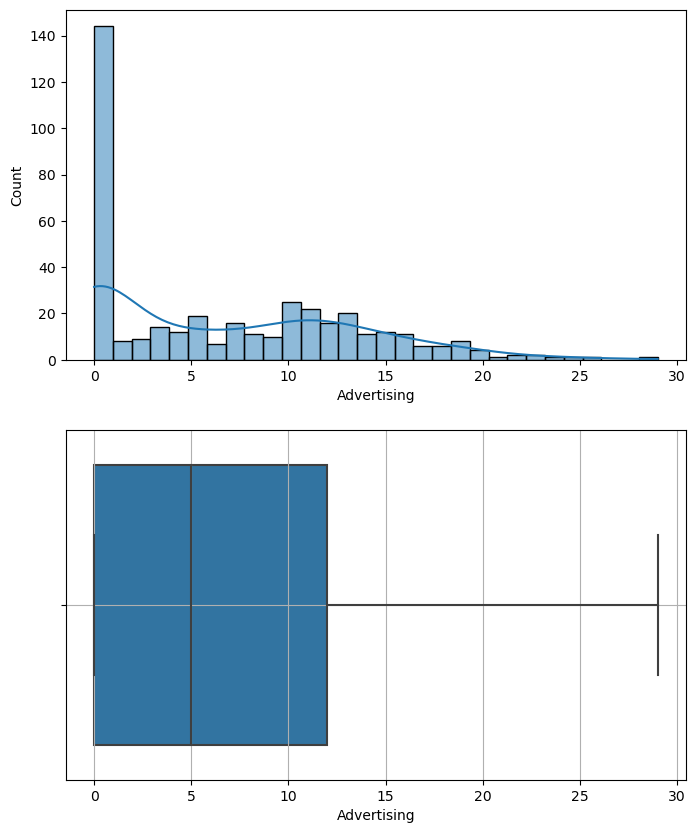

In [35]:
eda1_n(data, 'Advertising', 30)

,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


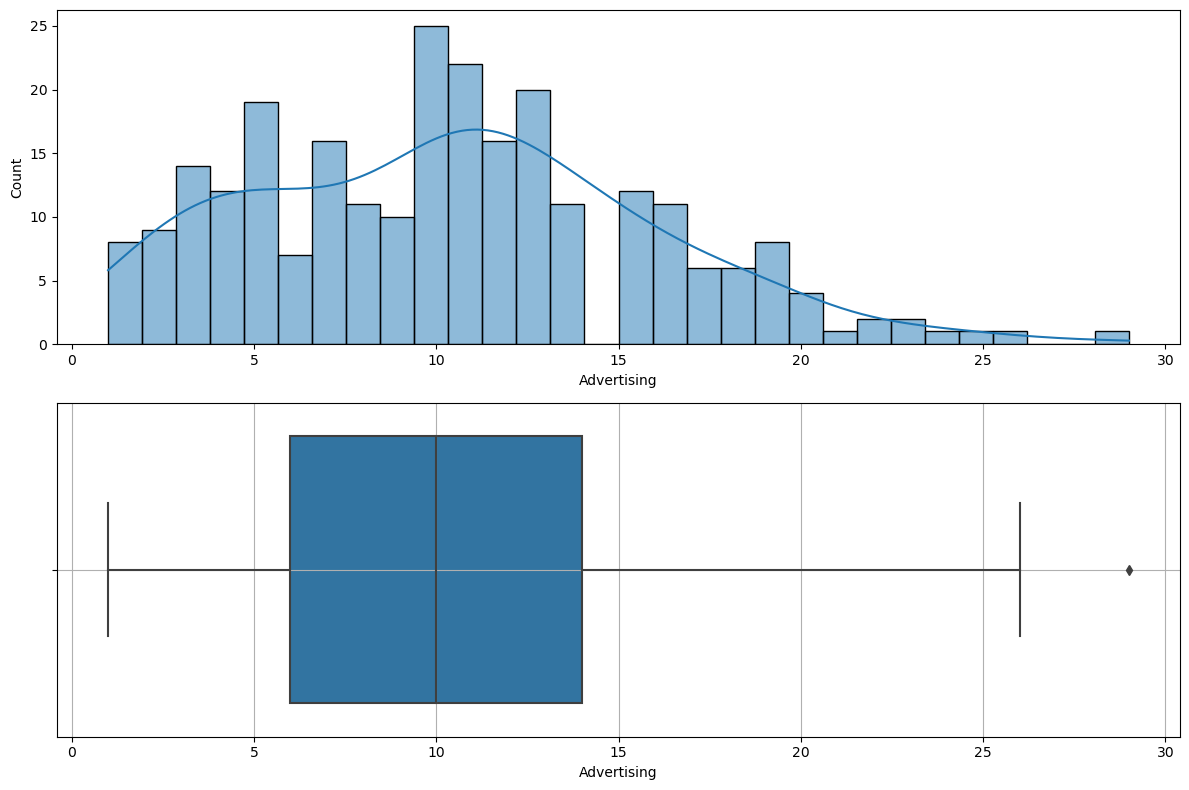

In [45]:
temp = data.loc[data['Advertising']>0]
eda1_n(temp, 'Advertising', 30)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

*일부지역들을 제외하고는 대부분 광고 예산이 적게 나타난 것으로 보아 광고에 큰 비중을 두지 않는 것으로 보임

5) 추가 분석해 볼 사항이 있나요?

## (5) Population

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


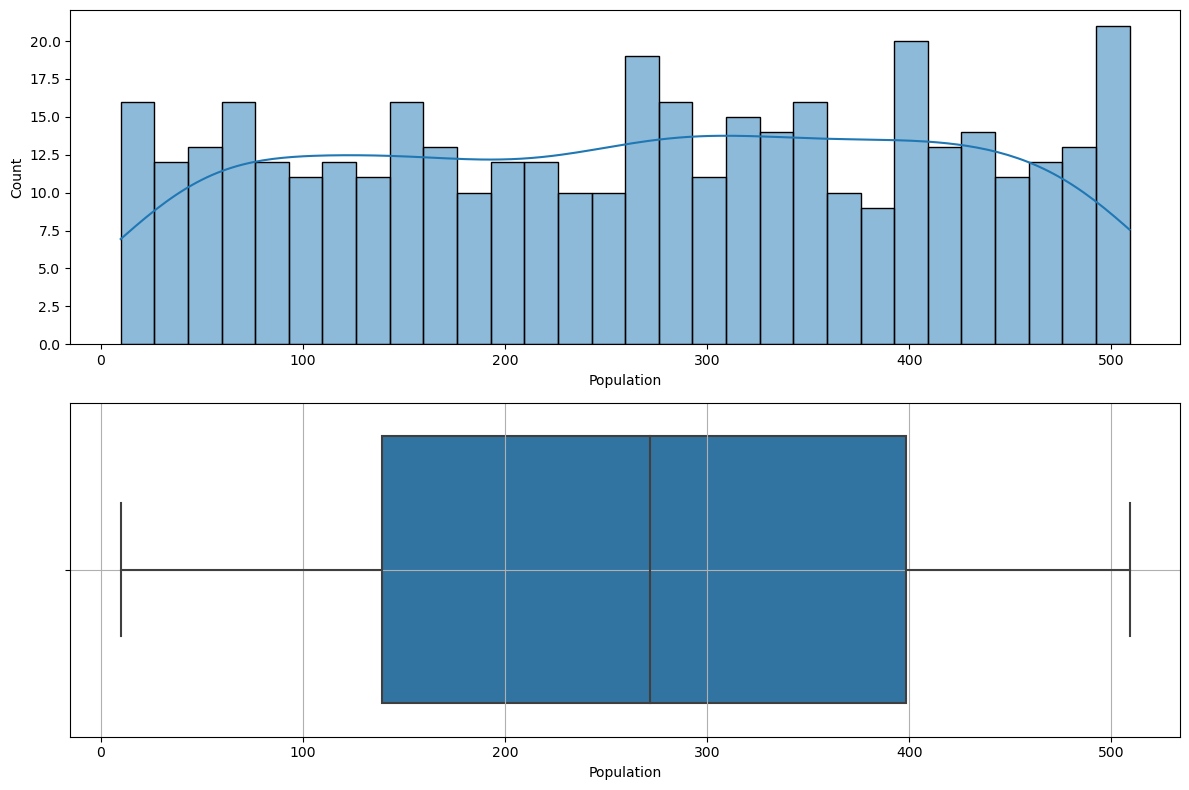

In [50]:
eda1_n(data, 'Population', 30)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (6) Price

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

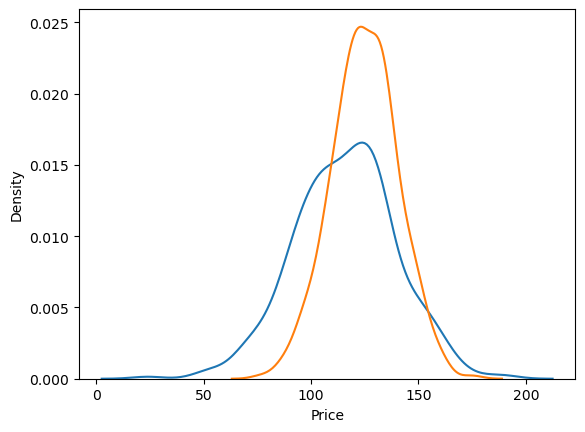

In [44]:
#자사 타사 비교
sns.kdeplot(x='Price',data=data)
sns.kdeplot(x='CompPrice',data=data)
plt.show()

## (7) Age

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

# 4.단변량분석 : 범주형 변수

## (1) ShelveLoc

In [47]:
def eda1_c(data, var) :
    print(data[var].value_counts())
    print(data[var].value_counts() / data[var].shape[0])

    sns.countplot(x= data[var])
    plt.grid()
    plt.show()

In [23]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

In [24]:
# 범주별 빈도수
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [25]:
# 범주별 비율
data[var].value_counts() / data[var].shape[0]

Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64

3) 분포 확인(시각화)

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


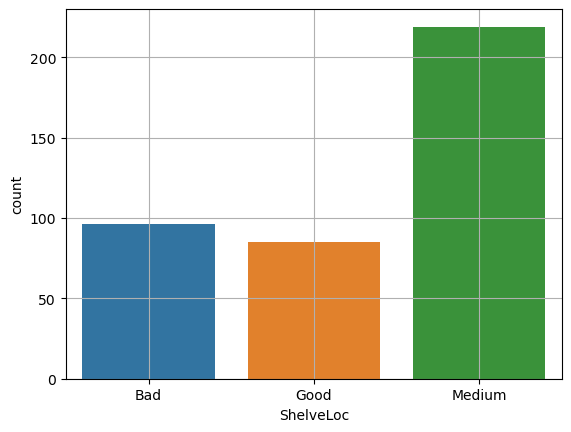

In [48]:
eda1_c(data, 'ShelveLoc')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

5) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

## (2) Urban

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [19]:
data['Urban'].value_counts()
data['Urban'].value_counts() / data['Urban'].shape[0]

Yes    0.705
No     0.295
Name: Urban, dtype: float64

3) 분포 확인(시각화)

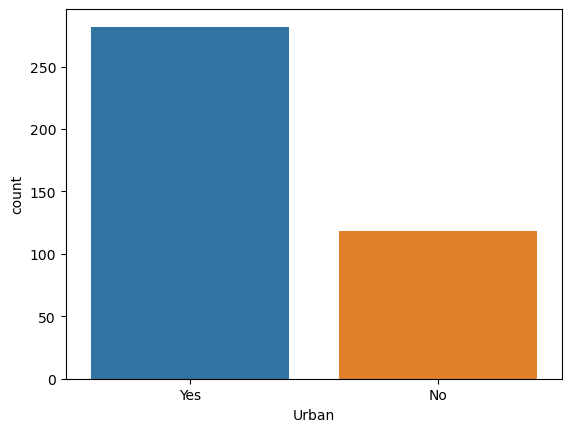

In [28]:
sns.countplot(x=data['Urban'])
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (3) US

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

In [30]:
data['US'].value_counts()
data['US'].value_counts() / data['US'].shape[0]

Yes    0.645
No     0.355
Name: US, dtype: float64

3) 분포 확인(시각화)

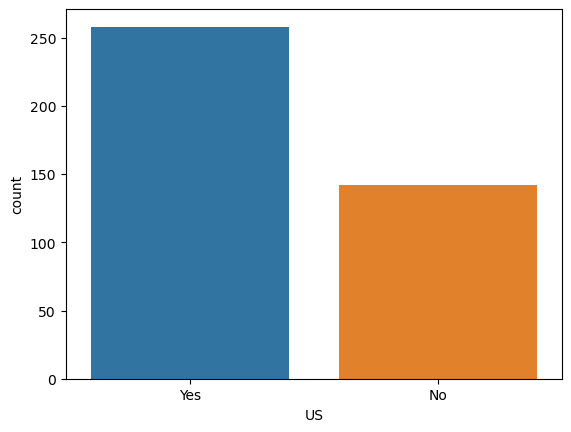

In [31]:
sns.countplot(x=data['US'])
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?